# Resample (and some other cool stuff) demo!

Looking at the Bellingham weather data, I'm going to look at the HourlyRelativeHumidity (mostly because I don't have to clean it) and resample it to examine it on a per-month level. Start by loading the data:

In [1]:
import pandas as pd

def data_url(city_name):
    base_url = "https://facultyweb.cs.wwu.edu/~wehrwes/courses/csci141_21s/fp/data/"
    return base_url + city_name + ".csv"

bham = pd.read_csv(data_url("WA_Bellingham"), parse_dates=["DATE"], low_memory=False)

Here's the magic of resample in action. What's happening here?
* The first argument `"MS"` says to resample **M**onthly, labeling each group with the **S**tart of the month.
* `on="DATE"` is the column containing the timestamps we're resampling on
This resample call resamples the entire dataframe, all columns included. Since we're just intersted in RH, we'll get only that column from the result.

In [29]:
# this gives us the maximum hourly relatiev humidity
hourly_humidity_permonth = bham.resample("MS", on="DATE")["HourlyRelativeHumidity"]
hourly_humidity_permonth

So that's interesting! The result of a `resample` is a familiar `GroupBy` object - the same thing we get when we call `groupby`. That means we can't directly poke at the results (it's like a pile of multiple dataframes), but we can call pandas functions on it to aggregate each one. What's the maximum RH per month? Just call `max()` on the groupby result.

In [30]:
hourly_humidity_permonth.max()

DATE
2020-01-01    100.0
2020-02-01    100.0
2020-03-01    100.0
2020-04-01     94.0
2020-05-01     94.0
2020-06-01     94.0
2020-07-01     94.0
2020-08-01     97.0
2020-09-01    100.0
2020-10-01    100.0
2020-11-01     97.0
2020-12-01    100.0
Freq: MS, Name: HourlyRelativeHumidity, dtype: float64

Average RH per month?

In [31]:
hourly_humidity_permonth.mean()

DATE
2020-01-01    76.605477
2020-02-01    79.876310
2020-03-01    70.918979
2020-04-01    65.603015
2020-05-01    69.106618
2020-06-01    73.459698
2020-07-01    72.490196
2020-08-01    72.806373
2020-09-01    81.267051
2020-10-01    82.047081
2020-11-01    79.328092
2020-12-01    89.361538
Freq: MS, Name: HourlyRelativeHumidity, dtype: float64

Want all the summary stats? `describe` is your tool of choice:

In [12]:
hourly_humidity_permonth.describe()

count       mean        std   min    25%   50%   75%    max
DATE                                                                    
2020-01-01   986.0  76.605477  10.910598  27.0  70.00  79.0  85.0  100.0
2020-02-01   954.0  79.876310  11.092164  39.0  73.00  82.0  89.0  100.0
2020-03-01   901.0  70.918979  17.570527  22.0  61.00  75.0  85.0  100.0
2020-04-01   796.0  65.603015  16.913935  16.0  55.75  68.0  79.0   94.0
2020-05-01   816.0  69.106618  15.069562  28.0  58.00  72.0  80.0   94.0
2020-06-01   794.0  73.459698  11.880193  43.0  65.00  75.0  83.0   94.0
2020-07-01   816.0  72.490196  13.332921  34.0  63.00  75.0  84.0   94.0
2020-08-01   816.0  72.806373  13.934968  27.0  61.00  75.0  84.0   97.0
2020-09-01  1041.0  81.267051  14.993581  18.0  75.00  87.0  93.0  100.0
2020-10-01  1062.0  82.047081  12.306165  37.0  75.25  86.0  92.0  100.0
2020-11-01   954.0  79.328092  12.254657  25.0  74.00  82.5  89.0   97.0
2020-12-01  1040.0  89.361538   9.785872  44.0  85.00  90.0  97.0  100.0

Of course, I can't resist any excuse I can find to make a histogram. Remember that we can loop over the results of a `groupy` (and therefore the results of a `resample`, too). So let's histogram each month. I looked up a few Seaborn tricks to make this nicer:
* I'm making sure the bins are consistent across all months, and including all 10 bins of size 10 even if there's no data there.
* I'm setting the title of each plot to the *name* of the month, which if you can get from a `DateTime` object if you ask nicely (using the `month_name()` function).

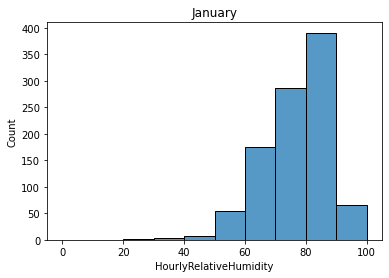

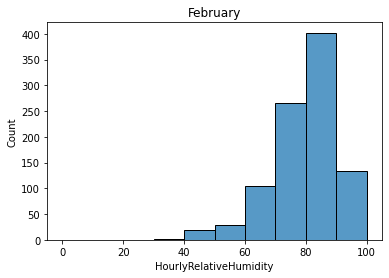

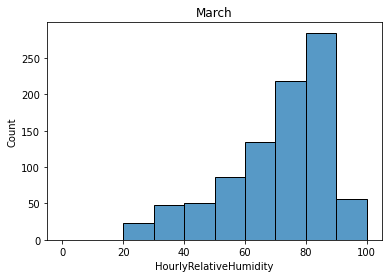

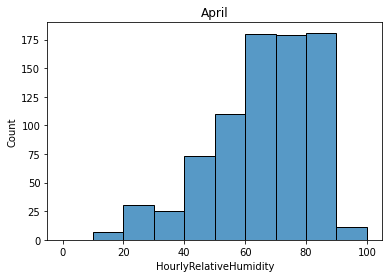

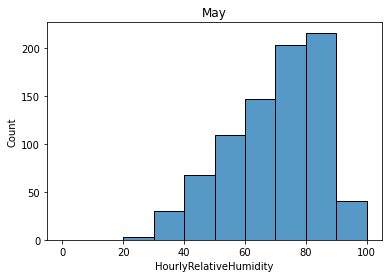

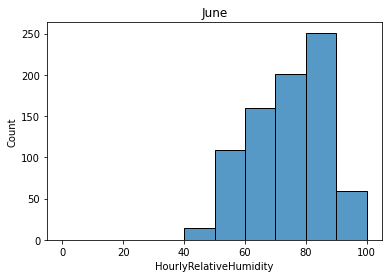

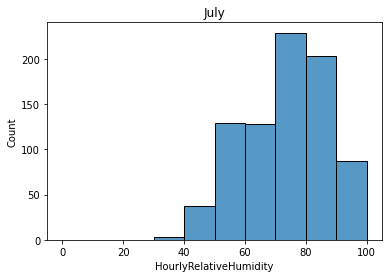

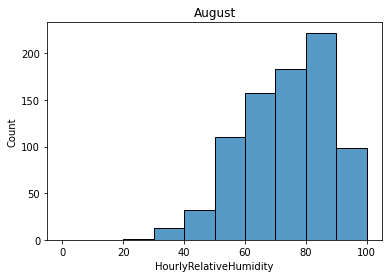

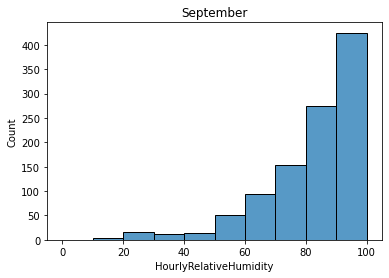

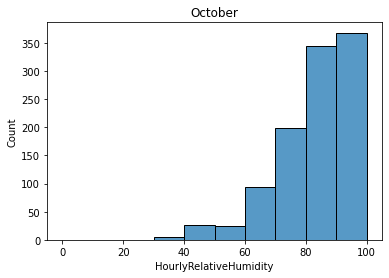

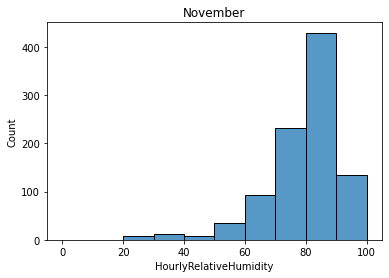

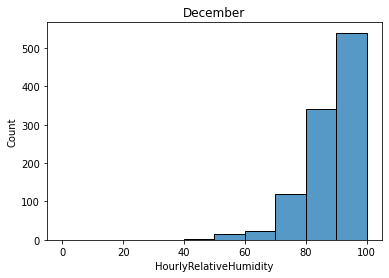

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

for month, data in hourly_humidity_permonth:
    sns.histplot(data, bins=range(0, 110, 10)).set(title=month.month_name())
    plt.show()

What the heck, now I want to know what Arizona looks like. In case the urge to look at any other cities strikes, I'm going to write a function that can be called on any city's data to generate these plots.

In [33]:
def humidity_plots(df):
    resampled = df.resample("MS", on="DATE")["HourlyRelativeHumidity"]
    
    for month, data in resampled:
        sns.histplot(data, bins=range(0, 110, 10)).set(title=month.month_name())
        plt.show()

In [32]:
phoenix = pd.read_csv(data_url("AZ_Phoenix"), low_memory=False, parse_dates=["DATE"])

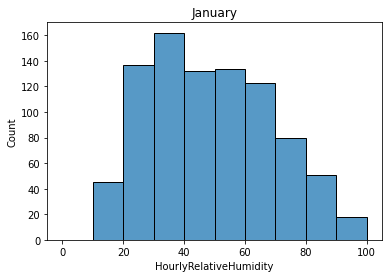

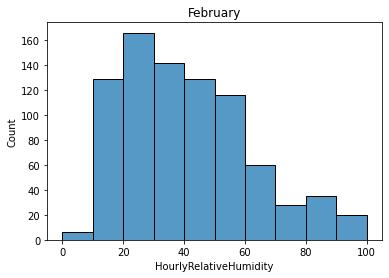

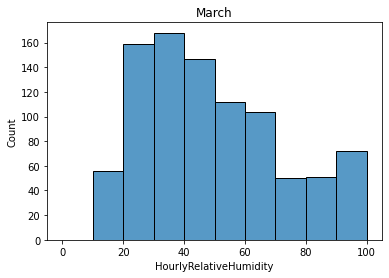

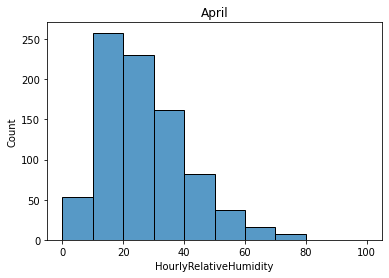

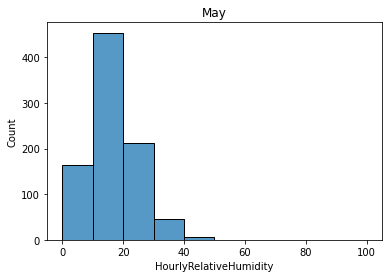

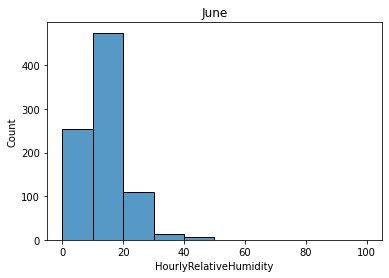

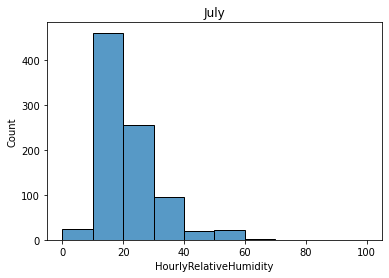

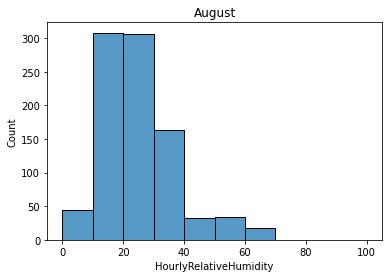

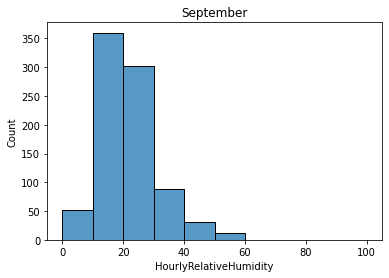

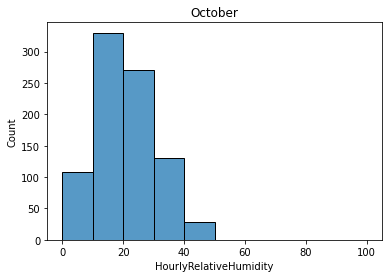

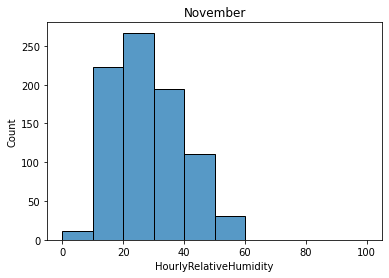

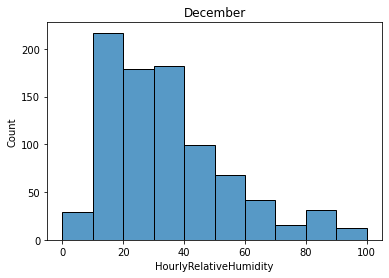

In [34]:
humidity_plots(phoenix)

Revealed: Phoenix is a lot drier than Bellingham!